<Figure size 1000x600 with 0 Axes>

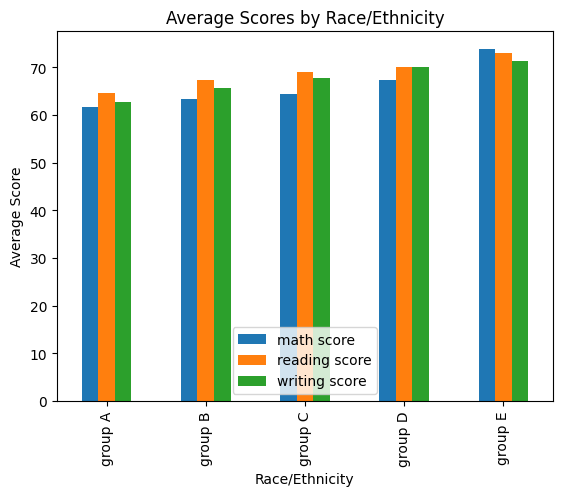

In [1]:
# 1st requirement - plot showing the math, reading and writing scores vs. race/ethnicity
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\palla\Downloads\StudentsPerformance.csv")
plt.figure(figsize=(10, 6))
data.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.title('Average Scores by Race/Ethnicity')
plt.show()

<Figure size 1200x600 with 0 Axes>

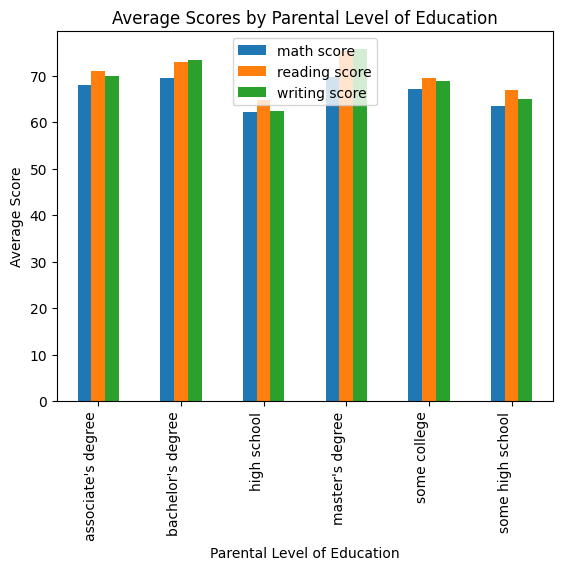

In [2]:
# 2nd requirement- plot showing the math, reading and writing scores vs. parental level of education
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\palla\Downloads\StudentsPerformance.csv")
plt.figure(figsize=(12, 6))
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.title('Average Scores by Parental Level of Education')
plt.xticks(rotation=90, ha='right')
plt.show()

In [2]:
# 3rd requirement - data to show only the scores of females in group 
import pandas as pd
import pyodbc as py
data = pd.read_csv(r"C:\Users\palla\Downloads\StudentsPerformance.csv")
filtered_data = data[(data['gender'] == 'female') & (data['race/ethnicity'] == 'group A') & (data['test preparation course'] == 'completed')]
conn=py.connect(
'Driver={SQL Server};'
'Server=DESKTOP-VJDC796\SQLEXPRESS;'
'database=Studentperformance;'
'trusted_connection=yes;')
cursor = conn.cursor()

cursor.execute("CREATE TABLE FemaleGroupACompletedTest (gender NVARCHAR(10),race_ethnicity NVARCHAR(10), test_preparation_course NVARCHAR(10), math_score INT, reading_score INT, writing_score INT)")


for _, row in filtered_data.iterrows():
    cursor.execute("INSERT INTO FemaleGroupACompletedTest (gender, race_ethnicity, test_preparation_course, math_score, reading_score, writing_score) VALUES (?, ?, ?, ?, ?, ?)",
                   row['gender'], row['race/ethnicity'], row['test preparation course'], row['math score'], row['reading score'], row['writing score'])
conn.commit()
filtered_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
46,female,group A,associate's degree,standard,completed,55,65,62
423,female,group A,some high school,standard,completed,59,85,80
468,female,group A,high school,free/reduced,completed,77,88,85
546,female,group A,some high school,standard,completed,92,100,97
651,female,group A,high school,standard,completed,68,80,76
653,female,group A,associate's degree,standard,completed,65,70,74
778,female,group A,some college,standard,completed,72,79,82
820,female,group A,some high school,standard,completed,85,90,92
837,female,group A,high school,standard,completed,75,82,79
902,female,group A,high school,free/reduced,completed,34,48,41
